# Deviation Survey Workflow

In [1]:
# ONLY RUN ONCE, must restart notebook otherwise
import pandas as pd
import os
from pathlib import Path
current_dir = Path.cwd()
path = current_dir.parent
print(path)
#change directory to get src class data
os.chdir(path)
from src.data_object import *
from src.directional_survey import *
from src.data_batch import *

C:\Users\BpAmos\Documents\repos\directional-survey-converter


In [2]:
file = path / 'data/wellbore_survey.csv'
df = pd.read_csv(file, sep=',')
df_lat_lon_orig = df[['latitude_decimal_deg', 'longitude_decimal_deg']]

In [3]:
file = path / 'data/wellbore_survey.csv'

df = pd.read_csv(file, sep=',')

df = df[['wellId', 'md', 'inc', 'azim', 'surface_latitude', 'surface_longitude']]

In [4]:
loadJobJsonPath = path /'data/wellbore_survey.json'
#myJson = loadJobFile(loadJobJsonPath)
with open(loadJobJsonPath) as json_file:
        data = json.load(json_file)
json_file.close()
data

{'wellId': 'well_C',
 'md': [0.0,
  35.0,
  774.81,
  800.0,
  900.0,
  1000.0,
  1100.0,
  1200.0,
  1300.0,
  1400.0,
  1500.0,
  1600.0,
  1700.0,
  1800.0,
  1900.0,
  2000.0,
  2100.0,
  2200.0,
  2300.0,
  2400.0,
  2500.0,
  2600.0,
  2700.0,
  2800.0,
  2900.0,
  3000.0,
  3100.0,
  3200.0,
  3300.0,
  3400.0,
  3500.0,
  3600.0,
  3700.0,
  3800.0,
  3900.0,
  4000.0,
  4100.0,
  4200.0,
  4300.0,
  4400.0,
  4500.0,
  4600.0,
  4700.0,
  4800.0,
  4900.0,
  5000.0,
  5100.0,
  5200.0,
  5300.0,
  5400.0,
  5500.0,
  5600.0,
  5700.0,
  5800.0,
  5900.0,
  6000.0,
  6100.0,
  6200.0,
  6300.0,
  6400.0,
  6450.67,
  6532.0,
  6625.0,
  6720.0,
  6813.0,
  6909.0,
  7002.0,
  7098.0,
  7191.0,
  7286.0,
  7379.0,
  7475.0,
  7569.0,
  7663.0,
  7758.0,
  7851.0,
  7947.0,
  8040.0,
  8135.0,
  8229.0,
  8324.0,
  8418.0,
  8512.0,
  8606.0,
  8700.0,
  8794.0,
  8859.0,
  8924.0,
  9018.0,
  9112.0,
  9206.0,
  9292.0,
  9386.0,
  9481.0,
  9574.0,
  9669.0,
  9764.0,
  9858.0,

In [22]:
#DirectionalSurvey(data)
dataclass_obj = DataObject(wellId = data['wellId'],
                                       md = np.array(data['md']),
                                       inc = np.array(data['inc']),
                                       azim = np.array(data['azim']),
                                       surface_latitude = data['surface_latitude'],
                                       surface_longitude = data['surface_longitude'])
dataclass_obj

DataObject(wellId='well_C', md=array([    0.  ,    35.  ,   774.81,   800.  ,   900.  ,  1000.  ,
        1100.  ,  1200.  ,  1300.  ,  1400.  ,  1500.  ,  1600.  ,
        1700.  ,  1800.  ,  1900.  ,  2000.  ,  2100.  ,  2200.  ,
        2300.  ,  2400.  ,  2500.  ,  2600.  ,  2700.  ,  2800.  ,
        2900.  ,  3000.  ,  3100.  ,  3200.  ,  3300.  ,  3400.  ,
        3500.  ,  3600.  ,  3700.  ,  3800.  ,  3900.  ,  4000.  ,
        4100.  ,  4200.  ,  4300.  ,  4400.  ,  4500.  ,  4600.  ,
        4700.  ,  4800.  ,  4900.  ,  5000.  ,  5100.  ,  5200.  ,
        5300.  ,  5400.  ,  5500.  ,  5600.  ,  5700.  ,  5800.  ,
        5900.  ,  6000.  ,  6100.  ,  6200.  ,  6300.  ,  6400.  ,
        6450.67,  6532.  ,  6625.  ,  6720.  ,  6813.  ,  6909.  ,
        7002.  ,  7098.  ,  7191.  ,  7286.  ,  7379.  ,  7475.  ,
        7569.  ,  7663.  ,  7758.  ,  7851.  ,  7947.  ,  8040.  ,
        8135.  ,  8229.  ,  8324.  ,  8418.  ,  8512.  ,  8606.  ,
        8700.  ,  8794.  ,  885

In [2]:
# get wellbore df
file = path / 'data/wellbore_survey.csv'
df = pd.read_csv(file, sep=',')
df_lat_lon_orig = df[['latitude_decimal_deg', 'longitude_decimal_deg']]

#get wellbore json
json_path = path / 'data/wellbore_survey.json'

with open(json_path) as json_file:
    data = json.load(json_file)
json_file.close()

# get survey obj
#survey_obj = DirectionalSurvey(data)
#TODO: find way to not have to classify things as np.arrays
dataclass_obj = DataObject(wellId = data['wellId'],
                           md = np.array(data['md']),
                           inc = np.array(data['inc']),
                           azim = np.array(data['azim']),
                           surface_latitude = data['surface_latitude'],
                           surface_longitude = data['surface_longitude'])

survey_obj = DirectionalSurvey(dataclass_obj)
# run survey points calc
survey_points_obj = survey_obj.calculate_survey_points()

In [3]:
survey_obj

In [29]:
# get survey obj
survey_obj = Survey(dataclass_obj)
survey_obj.directional_survey_points

DirectionalSurvey(wellId='well_C', md=array([    0.  ,    35.  ,   774.81,   800.  ,   900.  ,  1000.  ,
        1100.  ,  1200.  ,  1300.  ,  1400.  ,  1500.  ,  1600.  ,
        1700.  ,  1800.  ,  1900.  ,  2000.  ,  2100.  ,  2200.  ,
        2300.  ,  2400.  ,  2500.  ,  2600.  ,  2700.  ,  2800.  ,
        2900.  ,  3000.  ,  3100.  ,  3200.  ,  3300.  ,  3400.  ,
        3500.  ,  3600.  ,  3700.  ,  3800.  ,  3900.  ,  4000.  ,
        4100.  ,  4200.  ,  4300.  ,  4400.  ,  4500.  ,  4600.  ,
        4700.  ,  4800.  ,  4900.  ,  5000.  ,  5100.  ,  5200.  ,
        5300.  ,  5400.  ,  5500.  ,  5600.  ,  5700.  ,  5800.  ,
        5900.  ,  6000.  ,  6100.  ,  6200.  ,  6300.  ,  6400.  ,
        6450.67,  6532.  ,  6625.  ,  6720.  ,  6813.  ,  6909.  ,
        7002.  ,  7098.  ,  7191.  ,  7286.  ,  7379.  ,  7475.  ,
        7569.  ,  7663.  ,  7758.  ,  7851.  ,  7947.  ,  8040.  ,
        8135.  ,  8229.  ,  8324.  ,  8418.  ,  8512.  ,  8606.  ,
        8700.  ,  8794. 

In [10]:
survey_points_obj = survey_obj.calculate_survey_points()
survey_points_obj.directional_survey_points

DirectionalSurvey(wellId='well_C', md=array([    0.  ,    35.  ,   774.81,   800.  ,   900.  ,  1000.  ,
        1100.  ,  1200.  ,  1300.  ,  1400.  ,  1500.  ,  1600.  ,
        1700.  ,  1800.  ,  1900.  ,  2000.  ,  2100.  ,  2200.  ,
        2300.  ,  2400.  ,  2500.  ,  2600.  ,  2700.  ,  2800.  ,
        2900.  ,  3000.  ,  3100.  ,  3200.  ,  3300.  ,  3400.  ,
        3500.  ,  3600.  ,  3700.  ,  3800.  ,  3900.  ,  4000.  ,
        4100.  ,  4200.  ,  4300.  ,  4400.  ,  4500.  ,  4600.  ,
        4700.  ,  4800.  ,  4900.  ,  5000.  ,  5100.  ,  5200.  ,
        5300.  ,  5400.  ,  5500.  ,  5600.  ,  5700.  ,  5800.  ,
        5900.  ,  6000.  ,  6100.  ,  6200.  ,  6300.  ,  6400.  ,
        6450.67,  6532.  ,  6625.  ,  6720.  ,  6813.  ,  6909.  ,
        7002.  ,  7098.  ,  7191.  ,  7286.  ,  7379.  ,  7475.  ,
        7569.  ,  7663.  ,  7758.  ,  7851.  ,  7947.  ,  8040.  ,
        8135.  ,  8229.  ,  8324.  ,  8418.  ,  8512.  ,  8606.  ,
        8700.  ,  8794. 

In [14]:
df_min_curve = survey_points_obj.get_survey_df()

In [15]:
df_test = pd.merge(df_min_curve, df_lat_lon_orig, left_index=True, right_index=True)
df_test

,wellId,md,inc,azim,tvd,e_w_deviation,n_s_deviation,dls,surface_latitude,surface_longitude,...,latitude_points,zone_number,zone_letter,x_points,y_points,surface_x,surface_y,isHorizontal,latitude_decimal_deg,longitude_decimal_deg
0,well_C,0.00,0.00,227.11,0.000000,0.000000e+00,0.000000e+00,0.000000,29.908294,47.688521,...,29.908294,38,R,759587.934440,3.311662e+06,759587.93444,3.311662e+06,Vertical,29.908294,47.688521
1,well_C,35.00,0.00,227.11,35.000000,-1.484001e-17,-1.378531e-17,0.000000,29.908294,47.688521,...,29.908294,38,R,759587.934440,3.311662e+06,759587.93444,3.311662e+06,Vertical,29.908294,47.688521
2,well_C,774.81,0.46,227.11,774.802052,-2.175842e+00,-2.021203e+00,0.062178,29.908294,47.688521,...,29.908289,38,R,759587.271243,3.311661e+06,759587.93444,3.311662e+06,Vertical,29.908289,47.688514
3,well_C,800.00,0.13,163.86,799.991684,-2.241984e+00,-2.117474e+00,1.312323,29.908294,47.688521,...,29.908289,38,R,759587.251083,3.311661e+06,759587.93444,3.311662e+06,Vertical,29.908289,47.688514
4,well_C,900.00,0.57,230.43,899.989571,-2.593878e+00,-2.543311e+00,0.439221,29.908294,47.688521,...,29.908288,38,R,759587.143826,3.311661e+06,759587.93444,3.311662e+06,Vertical,29.908288,47.688513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,well_C,10613.00,89.88,27.59,7660.358132,2.408116e+03,2.536985e+03,0.025961,29.908294,47.688521,...,29.915110,38,R,760321.928281,3.312435e+06,759587.93444,3.311662e+06,Horizontal,29.915108,47.696306
106,well_C,10707.00,90.00,26.69,7660.456505,2.450995e+03,2.620632e+03,0.120140,29.908294,47.688521,...,29.915337,38,R,760334.997584,3.312461e+06,759587.93444,3.311662e+06,Horizontal,29.915335,47.696447
107,well_C,10802.00,89.72,26.72,7660.688569,2.493687e+03,2.705499e+03,0.294745,29.908294,47.688521,...,29.915568,38,R,760348.010275,3.312487e+06,759587.93444,3.311662e+06,Horizontal,29.915566,47.696588
108,well_C,10851.00,90.06,27.04,7660.782610,2.515841e+03,2.749204e+03,0.692054,29.908294,47.688521,...,29.915686,38,R,760354.762783,3.312500e+06,759587.93444,3.311662e+06,Horizontal,29.915684,47.696661


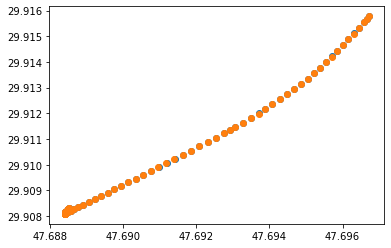

In [16]:
import matplotlib.pyplot as plt
plt.scatter(x=df_test['longitude_points'], y=df_test['latitude_points'])
plt.scatter(x=df_test['longitude_decimal_deg'], y=df_test['latitude_decimal_deg'])
plt.show()

In [13]:
inc = survey_points_obj.directional_survey_points.inc

In [19]:
#inc_horz = np.where((inc > 88), 'Horizontal', 'Vertical')
inc_horz = np.greater(inc,88)
inc_horz = np.where((inc_horz == True), 'Horizontal', 'Vertical')
inc_horz

array(['Vertical', 'Vertical', 'Vertical', 'Vertical', 'Vertical',
       'Vertical', 'Vertical', 'Vertical', 'Vertical', 'Vertical',
       'Vertical', 'Vertical', 'Vertical', 'Vertical', 'Vertical',
       'Vertical', 'Vertical', 'Vertical', 'Vertical', 'Vertical',
       'Vertical', 'Vertical', 'Vertical', 'Vertical', 'Vertical',
       'Vertical', 'Vertical', 'Vertical', 'Vertical', 'Vertical',
       'Vertical', 'Vertical', 'Vertical', 'Vertical', 'Vertical',
       'Vertical', 'Vertical', 'Vertical', 'Vertical', 'Vertical',
       'Vertical', 'Vertical', 'Vertical', 'Vertical', 'Vertical',
       'Vertical', 'Vertical', 'Vertical', 'Vertical', 'Vertical',
       'Vertical', 'Vertical', 'Vertical', 'Vertical', 'Vertical',
       'Vertical', 'Vertical', 'Vertical', 'Vertical', 'Vertical',
       'Vertical', 'Vertical', 'Vertical', 'Vertical', 'Vertical',
       'Vertical', 'Vertical', 'Vertical', 'Vertical', 'Vertical',
       'Vertical', 'Vertical', 'Vertical', 'Vertical', 'Vertic

In [11]:
# load data
file = path/'data/wellbore_survey_IHS.csv'

df = pd.read_csv(file, sep=',')


df.rename(columns={'UWI':'wellId',
                   'Measured Depth':'md',
                   'Deviation Angle':'inc',
                   'Deviation Azimuth':'azim',
                   'TV Depth':'tvd',
                   'Deviation N/S':'n_s_deviation',
                   'N/S':'n_s',
                   'Deviation E/W':'e_w_deviation',
                   'E/W':'e_w',
                   'Surface Latitude':'surface_latitude',
                   'Surface Longitude':'surface_longitude',
                   'BH Latitude':'btm_latitude',
                   'BH Longitude':'btm_longitude',},inplace=True)

df.tail()

,wellId,md,tvd,inc,azim,n_s_deviation,n_s,e_w_deviation,e_w,PRODFit Formation Code,PRODFit Formation Name,Point Type Code,Point Type Name,surface_latitude,surface_longitude,btm_latitude,btm_longitude
155,well_d,11017,8376.42,91.7,299.9,1441.98,N,2499.79,W,NaN,NaN,NaN,NaN,33.473325,-97.475159,33.477481,-97.483764
156,well_d,11049,8375.39,92.0,299.6,1457.85,N,2527.56,W,NaN,NaN,NaN,NaN,33.473325,-97.475159,33.477481,-97.483764
157,well_d,11081,8374.66,90.6,299.5,1473.63,N,2555.39,W,NaN,NaN,NaN,NaN,33.473325,-97.475159,33.477481,-97.483764
158,well_d,11106,8374.44,90.4,299.3,1485.90,N,2577.17,W,NaN,NaN,NaN,NaN,33.473325,-97.475159,33.477481,-97.483764
159,well_d,11160,8374.07,90.4,299.3,1512.32,N,2624.26,W,NaN,NaN,PE,"PROJECTED, END POINT",33.473325,-97.475159,33.477481,-97.483764


In [12]:
# create dataframe of interest


my_df = df
#my_df = df[['wellId','md','inc','azim','surface_latitude', 'surface_longitude']]
my_df.tail()

,wellId,md,tvd,inc,azim,n_s_deviation,n_s,e_w_deviation,e_w,PRODFit Formation Code,PRODFit Formation Name,Point Type Code,Point Type Name,surface_latitude,surface_longitude,btm_latitude,btm_longitude
155,well_d,11017,8376.42,91.7,299.9,1441.98,N,2499.79,W,NaN,NaN,NaN,NaN,33.473325,-97.475159,33.477481,-97.483764
156,well_d,11049,8375.39,92.0,299.6,1457.85,N,2527.56,W,NaN,NaN,NaN,NaN,33.473325,-97.475159,33.477481,-97.483764
157,well_d,11081,8374.66,90.6,299.5,1473.63,N,2555.39,W,NaN,NaN,NaN,NaN,33.473325,-97.475159,33.477481,-97.483764
158,well_d,11106,8374.44,90.4,299.3,1485.90,N,2577.17,W,NaN,NaN,NaN,NaN,33.473325,-97.475159,33.477481,-97.483764
159,well_d,11160,8374.07,90.4,299.3,1512.32,N,2624.26,W,NaN,NaN,PE,"PROJECTED, END POINT",33.473325,-97.475159,33.477481,-97.483764


In [13]:
survey_dict = my_df.to_dict(orient='records')
survey_dict

[{'wellId': 'well_d',
  'md': 0,
  'tvd': 0.0,
  'inc': 0.0,
  'azim': 0.0,
  'n_s_deviation': 0.0,
  'n_s': 'N',
  'e_w_deviation': 0.0,
  'e_w': 'E',
  'PRODFit Formation Code': nan,
  'PRODFit Formation Name': nan,
  'Point Type Code': nan,
  'Point Type Name': nan,
  'surface_latitude': 33.4733248,
  'surface_longitude': -97.47515859999999,
  'btm_latitude': 33.477480699999994,
  'btm_longitude': -97.4837642},
 {'wellId': 'well_d',
  'md': 100,
  'tvd': 100.0,
  'inc': 0.3,
  'azim': 170.2,
  'n_s_deviation': 0.22,
  'n_s': 'S',
  'e_w_deviation': 0.04,
  'e_w': 'E',
  'PRODFit Formation Code': nan,
  'PRODFit Formation Name': nan,
  'Point Type Code': nan,
  'Point Type Name': nan,
  'surface_latitude': 33.4733248,
  'surface_longitude': -97.47515859999999,
  'btm_latitude': 33.477480699999994,
  'btm_longitude': -97.4837642},
 {'wellId': 'well_d',
  'md': 200,
  'tvd': 200.0,
  'inc': 0.4,
  'azim': 171.4,
  'n_s_deviation': 0.77,
  'n_s': 'S',
  'e_w_deviation': 0.13,
  'e_w': '

In [14]:
# create survey obj

survey_dict = my_df.to_dict(orient='records')
survey_obj = Survey(survey_dict)

In [15]:
def get_directional_survey_dataclass(survey_data_list):
    """
    iterates over a list of production data
    looks for field names that match the ProductionMonthly dataclass fields
    converts these key value pairs to np.arrays and puts them in an empty dict
    returns the ProductionMonthly dataclass object for this new dict

    Args:
    survey_data_list (list of dicts) list of directional survey data dicts to iterate over
    (data dict should should match required dict format for DirectionalSurvey dataclass)

    Returns:
    DirectionalSurvey dataclass object for one well
    """

    # DirectionalSurvey dataclass fields
    survey_fields_list = ['wellId', 'md', 'inc', 'azim', 'tvd',
                              'n_s_deviation', 'n_s', 'x_offset', 
                              'e_w_deviation', 'e_w', 'y_offset', 'dls',
                              'surface_latitude', 'surface_longitude',
                              'surface_x','surface_y','x_points','y_points',
                              'zone_number','zone_letter','latitude_points','longitude_points']
                              
    survey_dict = {}
    for field_name in survey_fields_list:
        # get available dict fields from production data
        if field_name in list(survey_data_list[0].keys()):
            # convert data to np.array and update dict
            survey_dict.update({field_name: np.asarray([ROW[field_name] for ROW in survey_data_list])})
    print(survey_dict)
    # get ProductionMonthly dataclass object for dict
    directional_survey = DirectionalSurvey(**survey_dict)

    return directional_survey

In [16]:
get_directional_survey_dataclass(survey_dict)
# save to json

{'wellId': array(['well_d', 'well_d', 'well_d', 'well_d', 'well_d', 'well_d',
       'well_d', 'well_d', 'well_d', 'well_d', 'well_d', 'well_d',
       'well_d', 'well_d', 'well_d', 'well_d', 'well_d', 'well_d',
       'well_d', 'well_d', 'well_d', 'well_d', 'well_d', 'well_d',
       'well_d', 'well_d', 'well_d', 'well_d', 'well_d', 'well_d',
       'well_d', 'well_d', 'well_d', 'well_d', 'well_d', 'well_d',
       'well_d', 'well_d', 'well_d', 'well_d', 'well_d', 'well_d',
       'well_d', 'well_d', 'well_d', 'well_d', 'well_d', 'well_d',
       'well_d', 'well_d', 'well_d', 'well_d', 'well_d', 'well_d',
       'well_d', 'well_d', 'well_d', 'well_d', 'well_d', 'well_d',
       'well_d', 'well_d', 'well_d', 'well_d', 'well_d', 'well_d',
       'well_d', 'well_d', 'well_d', 'well_d', 'well_d', 'well_d',
       'well_d', 'well_d', 'well_d', 'well_d', 'well_d', 'well_d',
       'well_d', 'well_d', 'well_d', 'well_d', 'well_d', 'well_d',
       'well_d', 'well_d', 'well_d', 'well_d', 'wel

DirectionalSurvey(wellId=array(['well_d', 'well_d', 'well_d', 'well_d', 'well_d', 'well_d',
       'well_d', 'well_d', 'well_d', 'well_d', 'well_d', 'well_d',
       'well_d', 'well_d', 'well_d', 'well_d', 'well_d', 'well_d',
       'well_d', 'well_d', 'well_d', 'well_d', 'well_d', 'well_d',
       'well_d', 'well_d', 'well_d', 'well_d', 'well_d', 'well_d',
       'well_d', 'well_d', 'well_d', 'well_d', 'well_d', 'well_d',
       'well_d', 'well_d', 'well_d', 'well_d', 'well_d', 'well_d',
       'well_d', 'well_d', 'well_d', 'well_d', 'well_d', 'well_d',
       'well_d', 'well_d', 'well_d', 'well_d', 'well_d', 'well_d',
       'well_d', 'well_d', 'well_d', 'well_d', 'well_d', 'well_d',
       'well_d', 'well_d', 'well_d', 'well_d', 'well_d', 'well_d',
       'well_d', 'well_d', 'well_d', 'well_d', 'well_d', 'well_d',
       'well_d', 'well_d', 'well_d', 'well_d', 'well_d', 'well_d',
       'well_d', 'well_d', 'well_d', 'well_d', 'well_d', 'well_d',
       'well_d', 'well_d', 'well_d', 

In [5]:
# gen lat lon survey

#my_survey_lat_lon = survey_obj.get_lat_lon_from_deviation()
#my_survey_lat_lon.tail()

In [6]:
# import matplotlib.pyplot as plt
# plt.scatter(x=my_survey_lat_lon['longitude_points'], y=my_survey_lat_lon['latitude_points'])
# plt.show()

# Convert with only MD, INCL, AZIM, Surface lat lon

use Minimum Curvature Algo

In [17]:
my_df = df
my_df = df[['wellId','md','inc','azim','surface_latitude','surface_longitude']]
my_df.tail()

,wellId,md,inc,azim,surface_latitude,surface_longitude
155,well_d,11017,91.7,299.9,33.473325,-97.475159
156,well_d,11049,92.0,299.6,33.473325,-97.475159
157,well_d,11081,90.6,299.5,33.473325,-97.475159
158,well_d,11106,90.4,299.3,33.473325,-97.475159
159,well_d,11160,90.4,299.3,33.473325,-97.475159


In [18]:
survey_dict = my_df.to_dict(orient='records')
survey_obj = Survey(survey_dict)

In [19]:
df_min_curve = survey_obj.minimum_curvature_algo()
df_min_curve.tail()

converted surface x and y to surface lat and long
converted adjusted x and y back to lat long


,wellId,md,inc,azim,e_w_deviation,n_s_deviation,dls,surface_latitude,surface_longitude,surface_x,surface_y,zone_number,zone_letter,x_points,y_points,latitude_points,longitude_points
155,well_d,11017,91.7,299.9,-2499.763906,1442.009376,1.330008,33.473325,-97.475159,641685.494359,3.704802e+06,14,S,640923.566321,3.705241e+06,33.477388,-97.483287
156,well_d,11049,92.0,299.6,-2527.531684,1457.880059,1.325480,33.473325,-97.475159,641685.494359,3.704802e+06,14,S,640915.102702,3.705246e+06,33.477433,-97.483377
157,well_d,11081,90.6,299.5,-2555.361412,1473.657511,4.386144,33.473325,-97.475159,641685.494359,3.704802e+06,14,S,640906.620201,3.705251e+06,33.477478,-97.483467
158,well_d,11106,90.4,299.3,-2577.140878,1485.929673,1.131350,33.473325,-97.475159,641685.494359,3.704802e+06,14,S,640899.981820,3.705255e+06,33.477512,-97.483538
159,well_d,11160,90.4,299.3,-2624.231412,1512.355787,0.000000,33.473325,-97.475159,641685.494359,3.704802e+06,14,S,640885.628625,3.705263e+06,33.477587,-97.483691


In [20]:
df_min_curve

,wellId,md,inc,azim,e_w_deviation,n_s_deviation,dls,surface_latitude,surface_longitude,surface_x,surface_y,zone_number,zone_letter,x_points,y_points,latitude_points,longitude_points
0,well_d,0,0.0,0.0,0.000000,0.000000,0.000000,33.473325,-97.475159,641685.494359,3.704802e+06,14,S,641685.494359,3.704802e+06,33.473325,-97.475158
1,well_d,100,0.3,170.2,0.044560,-0.257979,0.300000,33.473325,-97.475159,641685.494359,3.704802e+06,14,S,641685.507941,3.704802e+06,33.473324,-97.475158
2,well_d,200,0.4,171.4,0.141317,-0.861096,0.100263,33.473325,-97.475159,641685.494359,3.704802e+06,14,S,641685.537433,3.704802e+06,33.473322,-97.475158
3,well_d,300,0.3,223.4,0.013635,-1.396451,0.319751,33.473325,-97.475159,641685.494359,3.704802e+06,14,S,641685.498515,3.704801e+06,33.473321,-97.475158
4,well_d,400,0.7,221.8,-0.573398,-2.042043,0.400205,33.473325,-97.475159,641685.494359,3.704802e+06,14,S,641685.319588,3.704801e+06,33.473319,-97.475160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,well_d,11017,91.7,299.9,-2499.763906,1442.009376,1.330008,33.473325,-97.475159,641685.494359,3.704802e+06,14,S,640923.566321,3.705241e+06,33.477388,-97.483287
156,well_d,11049,92.0,299.6,-2527.531684,1457.880059,1.325480,33.473325,-97.475159,641685.494359,3.704802e+06,14,S,640915.102702,3.705246e+06,33.477433,-97.483377
157,well_d,11081,90.6,299.5,-2555.361412,1473.657511,4.386144,33.473325,-97.475159,641685.494359,3.704802e+06,14,S,640906.620201,3.705251e+06,33.477478,-97.483467
158,well_d,11106,90.4,299.3,-2577.140878,1485.929673,1.131350,33.473325,-97.475159,641685.494359,3.704802e+06,14,S,640899.981820,3.705255e+06,33.477512,-97.483538


In [21]:
min(df_min_curve['latitude_points'])

33.47324239217407

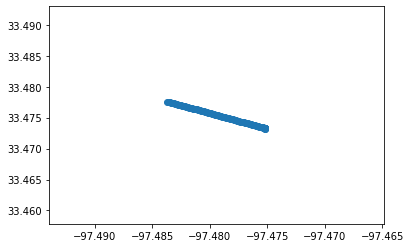

In [22]:
import matplotlib.pyplot as plt
plt.scatter(x=df_min_curve['longitude_points'], y=df_min_curve['latitude_points'])

plt.show()

In [13]:
Path.cwd()

WindowsPath('C:/Users/BpAmos/Documents/repos/directional-survey-converter/src')

# TESTING

In [23]:

#Minimual Curvature Algo Testing

# # load data
file = path/'data/wellbore_survey_2.csv'

df = pd.read_csv(file, sep=',')

df.rename(columns={'wellId':'wellId',
                   'MD':'md',
                   'Inclination':'inc',
                   'Azimuth':'azim',
                   'TVD':'tvd',
                   'North':'n_s_deviation',
                   'East':'e_w_deviation',
                   'surface_latitude':'surface_latitude',
                   'surface_longitude':'surface_longitude',},inplace=True)

df_latlon_orig = df[['latitude_decimal_deg','longitude_decimal_deg']]

df = df[['wellId','md','inc','azim','surface_latitude','surface_longitude']]
survey_dict = df.to_dict(orient='records')
survey_obj = Survey(survey_dict)
df_min_curve = survey_obj.minimum_curvature_algo()

df_test = pd.merge(df_min_curve,df_latlon_orig,left_index=True,right_index=True)

def get_change(current, previous):
    if current == previous:
        return 0
    try:
        return (abs(current - previous) / previous) * 100.0
    except ZeroDivisionError:
        return float('inf')

lat_test_list = list(zip(df_test['latitude_points'], df_test['latitude_decimal_deg']))

max_lat_delta = max([get_change(row[0],row[1]) for row in lat_test_list])

# tolerance test
# if the highest delta from the actual lat points is less than 0.01% the survey passes
if max_lat_delta <= 0.0001:
    print('latitude pass')
else:
    print('fail')

lon_test_list = list(zip(df_test['longitude_points'], df_test['longitude_decimal_deg']))

max_lon_delta = max([get_change(row[0],row[1]) for row in lon_test_list])

# tolerance test
# if the highest delta from the actual lon points is less than 0.01% the survey passes
if max_lon_delta <= 0.0001:
    print('longitute pass')
else:
    print('fail')

converted surface x and y to surface lat and long
converted adjusted x and y back to lat long
latitude pass
longitute pass


In [15]:
round(max_lon_delta*10000)

#0.0001*100000

0

In [24]:
# df_latlon_orig.rename(columns={'latitude_decimal_deg':'latitude_points',
#                               'longitude_decimal_deg':'longitude_points'},inplace=True)
# df_latlon_orig['wellId'] = 'well_B'
# df_latlon_orig['color'] = 'blue'

# df_min_curve['color'] = 'red'

# df_min_curve[['wellId','latitude_points','longitude_points']]
# df_test = df_min_curve.append(df_latlon_orig)
# df_test

In [5]:
def read_data(path_file):
    
    file = path_file
    
    df = pd.read_csv(file, sep=',')
    
    survey_dict = df.to_dict(orient='records')
    
    return survey_dict

In [21]:
file = Path.cwd()/'data/wellbore_survey_3.csv'
my_data = read_data(file)



my_data[0]


{'wellId': 'well_C',
 'md': 0.0,
 'inc': 0.0,
 'azim': 227.11,
 'tvd': 0.0,
 'TVD from Fld Ref': -118.0,
 'n_s_deviaition': 0.0,
 'e_w_deviation': 0.0,
 'Grid East': 769516.0,
 'Grid North': 3300805.0,
 'DLS': 0.0,
 'Toolface': 0.0,
 'Build Rate': 0.0,
 'Turn  Rate': 0.0,
 'Vert   Sect': 0.0,
 'Major Semi': 0.0,
 'Minor Semi': 0.0,
 'Vert  Semi': 0.0,
 'Minor Azim': 0.0,
 'surface_latitude': 29.80829444,
 'surface_longitude': 47.78852083,
 'latitude_decimal_deg': 29.80829444,
 'longitude_decimal_deg': 47.78852083}

In [5]:
# # load data
file = Path.cwd()/'data/wellbore_survey_2.csv'

df = pd.read_csv(file, sep=',')

df.rename(columns={'wellId':'wellId',
                   'MD':'md',
                   'Inclination':'inc',
                   'Azimuth':'azim',
                   'TVD':'tvd',
                   'North':'n_s_deviation',
                   'East':'e_w_deviation',
                   'surface_latitude':'surface_latitude',
                   'surface_longitude':'surface_longitude',},inplace=True)

df_latlon_orig = df[['latitude_decimal_deg','longitude_decimal_deg']]

df = df[['wellId','md','inc','azim','surface_latitude','surface_longitude']]
survey_dict = df.to_dict(orient='records')
survey_obj = Survey(survey_dict)
df_min_curve = survey_obj.minimum_curvature_algo()
df_min_curve

converted surface x and y to surface lat and long
converted adjusted x and y back to lat long


,wellId,md,inc,azim,e_w_deviation,n_s_deviation,dls,surface_latitude,surface_longitude,surface_x,surface_y,zone_number,zone_letter,x_points,y_points,latitude_points,longitude_points
0,well_C,0.00,0.00,227.11,0.000000,0.000000,0.000000,29.808294,47.788521,769516.003687,3.300805e+06,38,R,769516.003687,3.300805e+06,29.808294,47.788524
1,well_C,35.00,0.00,227.11,0.000000,0.000000,0.000000,29.808294,47.788521,769516.003687,3.300805e+06,38,R,769516.003687,3.300805e+06,29.808294,47.788524
2,well_C,774.81,0.46,227.11,-2.175842,-2.021203,0.062178,29.808294,47.788521,769516.003687,3.300805e+06,38,R,769515.340490,3.300804e+06,29.808289,47.788517
3,well_C,800.00,0.13,163.86,-2.241984,-2.117474,1.659124,29.808294,47.788521,769516.003687,3.300805e+06,38,R,769515.320330,3.300804e+06,29.808289,47.788517
4,well_C,900.00,0.57,230.43,-2.593879,-2.543313,0.531857,29.808294,47.788521,769516.003687,3.300805e+06,38,R,769515.213073,3.300804e+06,29.808288,47.788516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,well_C,10613.00,89.88,27.59,2408.197098,2537.080931,1.760414,29.808294,47.788521,769516.003687,3.300805e+06,38,R,770250.022162,3.301578e+06,29.815105,47.796305
106,well_C,10707.00,90.00,26.69,2451.076273,2620.730090,0.965920,29.808294,47.788521,769516.003687,3.300805e+06,38,R,770263.091735,3.301604e+06,29.815331,47.796447
107,well_C,10802.00,89.72,26.72,2493.768830,2705.596300,0.296424,29.808294,47.788521,769516.003687,3.300805e+06,38,R,770276.104426,3.301630e+06,29.815562,47.796588
108,well_C,10851.00,90.06,27.04,2515.922784,2749.301908,0.952866,29.808294,47.788521,769516.003687,3.300805e+06,38,R,770282.856951,3.301643e+06,29.815680,47.796661


In [15]:
survey_obj = Survey(survey_dict)
#survey_obj.directional_survey_points

In [20]:


survey_df = pd.DataFrame({'wellId':survey_obj.directional_survey_points.wellId,
                'md':survey_obj.directional_survey_points.md,
                'inc':survey_obj.directional_survey_points.inc,
                'azim':survey_obj.directional_survey_points.azim,
                'surface_latitude':survey_obj.directional_survey_points.surface_latitude,
                'surface_longitude':survey_obj.directional_survey_points.surface_longitude })


#Convert to Radians

df = survey_df.reset_index()

df['inc_rad'] = df['inc']*0.0174533 #converting to radians
df['azim_rad'] =df['azim']*0.0174533 #converting to radians

# calculate beta (dog leg angle)
df['beta'] = np.arccos(
            np.cos((df['inc_rad']) - (df['inc_rad'].shift(1))) - \
            (np.sin(df['inc_rad'].shift(1)) * np.sin(df['inc_rad']) * \
            (1-np.cos(df['azim_rad'] - df['azim_rad'].shift(1)))))

df['beta'] = df['beta'].fillna(0)

# dog leg severity per 100 ft
df['dls'] = (df['beta'] * 57.2958 * 100)/(df['md']-df['md'].shift(1))
df['dls'] = df['dls'].fillna(0)

# calculate ratio factor (radians)
df['rf'] = np.where(df['beta']==0, 1, 2/df['beta'] * np.tan(df['beta']/2))


# calculate total vertical depth
df['tvd'] = ((df['md']-df['md'].shift(1))/2) * \
                (np.cos(df['inc_rad'].shift(1)) + np.cos(df['inc_rad']))*df['rf']

df['tvd'] = df['tvd'].fillna(0)
df['tvd_cum'] =  df['tvd'].cumsum()

### calculating NS
df['ns'] = ((df['md']-df['md'].shift(1))/2) * \
                (
                np.sin(df['inc_rad'].shift(1)) * np.cos(df['azim_rad'].shift(1)) +
                np.sin(df['inc_rad']) * np.cos(df['azim_rad'])\
                ) * df['rf']

df['ns'] = df['ns'].fillna(0)
df['ns_cum'] =  df['ns'].cumsum()

## calculating EW
df['ew'] = ((df['md']-df['md'].shift(1))/2) * \
                (
                np.sin(df['inc_rad'].shift(1)) * \
                np.sin(df['azim_rad'].shift(1)) + \
                np.sin(df['inc_rad']) * np.sin(df['azim_rad'])\
                ) * df['rf']
df['ew'] = df['ew'].fillna(0)
df['ew_cum'] =  df['ew'].cumsum()

df['e_w_deviation'] = df['ew_cum']
df['n_s_deviation'] = df['ns_cum']


#survey_dict = df.to_dict(orient='records')
df

,index,wellId,md,inc,azim,surface_latitude,surface_longitude,inc_rad,azim_rad,beta,dls,rf,tvd,tvd_cum,ns,ns_cum,ew,ew_cum,e_w_deviation,n_s_deviation
0,0,well_d,0,0.0,0.0,33.473325,-97.475159,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,well_d,100,0.3,170.2,33.473325,-97.475159,0.005236,2.970552,0.005236,0.300000,1.000002,99.999543,99.999543,-0.257979,-0.257979,0.044560,0.044560,0.044560,-0.257979
2,2,well_d,200,0.4,171.4,33.473325,-97.475159,0.006981,2.991496,0.001750,0.100263,1.000000,99.998122,199.997665,-0.603117,-0.861096,0.096757,0.141317,0.141317,-0.861096
3,3,well_d,300,0.3,223.4,33.473325,-97.475159,0.005236,3.899067,0.005581,0.319751,1.000003,99.998356,299.996020,-0.535356,-1.396451,-0.127682,0.013635,0.013635,-1.396451
4,4,well_d,400,0.7,221.8,33.473325,-97.475159,0.012217,3.871142,0.006985,0.400205,1.000004,99.995990,399.992010,-0.645592,-2.042043,-0.587033,-0.573398,-0.573398,-2.042043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,155,well_d,11017,91.7,299.9,33.473325,-97.475159,1.600468,5.234245,0.007196,1.330008,1.000004,-0.811505,8376.422759,15.424399,1442.009376,-26.877969,-2499.763906,-2499.763906,1442.009376
156,156,well_d,11049,92.0,299.6,33.473325,-97.475159,1.605704,5.229009,0.007403,1.325480,1.000005,-1.033079,8375.389681,15.870683,1457.880059,-27.767778,-2527.531684,-2527.531684,1457.880059
157,157,well_d,11081,90.6,299.5,33.473325,-97.475159,1.581269,5.227263,0.024497,4.386144,1.000050,-0.725999,8374.663682,15.777452,1473.657511,-27.829728,-2555.361412,-2555.361412,1473.657511
158,158,well_d,11106,90.4,299.3,33.473325,-97.475159,1.577778,5.223773,0.004936,1.131350,1.000002,-0.218180,8374.445502,12.272162,1485.929673,-21.779467,-2577.140878,-2577.140878,1485.929673


In [22]:
# UNIT TEST

In [20]:
# Unit tests

import unittest

class TestMinCurve(unittest.TestCase):
    
    def test_survey_obj_data(self):
        
        file = Path.cwd()/'data/wellbore_survey_3.csv'

        df = pd.read_csv(file, sep=',')

        df_latlon_orig = df[['latitude_decimal_deg','longitude_decimal_deg']]
        df = df[['wellId','md','inc','azim','surface_latitude','surface_longitude']]
        
        survey_dict = df.to_dict(orient='records')
        survey_obj = Survey(survey_dict)
        self.assertEqual(len(survey_obj.directional_survey_points.wellId),110,'incorrect')
        self.assertEqual(len(survey_obj.directional_survey_points.md),110,'incorrect')
        self.assertEqual(len(survey_obj.directional_survey_points.inc),110,'incorrect')
        self.assertEqual(len(survey_obj.directional_survey_points.azim),110,'incorrect')
        self.assertEqual(len(survey_obj.directional_survey_points.surface_latitude),110,'incorrect')
        self.assertEqual(len(survey_obj.directional_survey_points.surface_longitude),110,'incorrect')
        

    def test_lat_long_calculation(self):
        
        
        file = Path.cwd()/'data/wellbore_survey_3.csv'

        df = pd.read_csv(file, sep=',')

        df = df[['wellId','md','inc','azim','surface_latitude','surface_longitude']]
        survey_dict = df.to_dict(orient='records')
        
        # get survey obj
        survey_obj = Survey(survey_dict)
        
        # run min curve algo
        df_min_curve = survey_obj.minimum_curvature_algo()

        df_test = pd.merge(df_min_curve,df_latlon_orig,left_index=True,right_index=True)

        def get_change(current, previous):
            # get abs change, else 0
            if current == previous:
                return 0
            try:
                return (abs(current - previous) / previous) * 100.0
            except ZeroDivisionError:
                return float('inf')

        #lat test
        lat_test_list = list(zip(df_test['latitude_points'], df_test['latitude_decimal_deg']))
        # get abs change
        max_lat_delta = max([get_change(row[0],row[1]) for row in lat_test_list])
        
        #lon test
        lon_test_list = list(zip(df_test['longitude_points'], df_test['longitude_decimal_deg']))
        # get abs change
        max_lon_delta = max([get_change(row[0],row[1]) for row in lon_test_list])
        
        # tolerance test
        # if the highest delta from the actual lat or lon points is less than 0.01% the survey passes
        self.assertEqual(round(max_lat_delta*10000),0,'latitude calculation not within 0.001%')    
        self.assertEqual(round(max_lon_delta*10000),0,'longitude calculation not within 0.001%')
        
        
tests = TestMinCurve()

tests_loaded = unittest.TestLoader().loadTestsFromModule(tests)

unittest.TextTestRunner().run(tests_loaded)

..

converted surface x and y to surface lat and long
converted adjusted x and y back to lat long



----------------------------------------------------------------------
Ran 2 tests in 0.121s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>